In [24]:
# load ds and ML libraries
import pandas as pd
import numpy as np
import matplotlib as plt
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

In [25]:
# load and inspect data
streetEasy = pd.read_csv('streeteasy.csv')
print(streetEasy.head())
# confirm 5000 entries
numRentals = streetEasy.rental_id.nunique()
print('There are {} rentals in the data set'.format(numRentals))

   rental_id  building_id   rent  bedrooms  bathrooms  size_sqft  \
0       1545     44518357   2550       0.0          1        480   
1       2472     94441623  11500       2.0          2       2000   
2      10234     87632265   3000       3.0          1       1000   
3       2919     76909719   4500       1.0          1        916   
4       2790     92953520   4795       1.0          1        975   

   min_to_subway  floor  building_age_yrs  no_fee  has_roofdeck  \
0              9    2.0                17       1             1   
1              4    1.0                96       0             0   
2              4    1.0               106       0             0   
3              2   51.0                29       0             1   
4              3    8.0                31       0             0   

   has_washer_dryer  has_doorman  has_elevator  has_dishwasher  has_patio  \
0                 0            0             1               1          0   
1                 0            0  

In [26]:
# Analyzing rent to square feet overall
averageRent = round(np.mean(streetEasy.rent), 2)
print('Average rent: ${}'.format(averageRent))
averageSqft = round(np.mean(streetEasy.size_sqft), 2)
print('Average square feet: {}'.format(averageSqft))
priceSf = round(averageRent/averageSqft, 2)
print('Average price per square foot in NYC: ${}'.format(priceSf))

Average rent: $4536.92
Average square feet: 920.1
Average price per square foot in NYC: $4.93


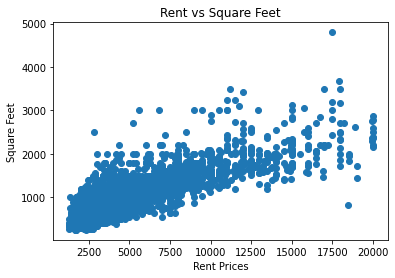

In [29]:
# plot the rent to square foot relationship
plt.scatter(streetEasy.rent, streetEasy.size_sqft)
plt.xlabel('Rent Prices')
plt.ylabel('Square Feet')
plt.title('Rent vs Square Feet')
plt.show()

In [44]:
# Analyzing rent to square feet by borough & neighborhood
uniqBoroughs = streetEasy.borough.unique()
uniqNeighb = streetEasy.neighborhood.unique()


# initialize lists for average rent, average sq ft, and the use those to calculate average rent per sqft in 
# each neigbborhood
neighbRent = []
neighbSqft = []
neighbAvgRent = []
for x in range(len(uniqNeighb)):
    neighbRent.append(round(np.mean((streetEasy.rent)[streetEasy.neighborhood == uniqNeighb[x]]), 2))
    neighbSqft.append(round(np.mean((streetEasy.size_sqft)[streetEasy.neighborhood == uniqNeighb[x]]), 2))

for x in range(len(neighbRent)):
    neighbAvgRent.append(round(neighbRent[x]/neighbSqft[x], 2))
    
# uncomment and run to display neighborhood sqft prices
#for x in range(len(uniqNeighb)):
 #   print('The average price per sq foot in {} is ${}'.format(uniqNeighb[x], neighbAvgRent[x]))



The average price per sq foot in Upper East Side is $5.42
The average price per sq foot in Greenwich Village is $5.93
The average price per sq foot in Astoria is $3.12
The average price per sq foot in Midtown is $5.65
The average price per sq foot in Williamsburg is $4.18
The average price per sq foot in Forest Hills is $2.39
The average price per sq foot in Soho is $6.06
The average price per sq foot in Central Harlem is $3.24
The average price per sq foot in Greenwood is $3.39
The average price per sq foot in Midtown East is $5.25
The average price per sq foot in Battery Park City is $5.86
The average price per sq foot in Gowanus is $3.66
The average price per sq foot in Flatiron is $6.68
The average price per sq foot in Brooklyn Heights is $4.72
The average price per sq foot in East Village is $5.6
The average price per sq foot in Midtown West is $5.37
The average price per sq foot in Upper West Side is $5.49
The average price per sq foot in Briarwood is $2.56
The average price per 

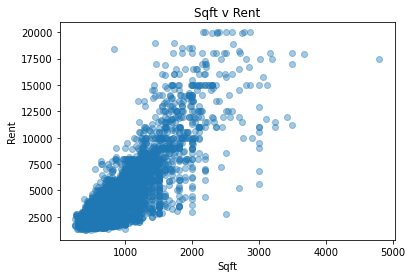

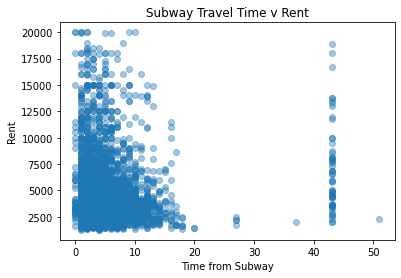

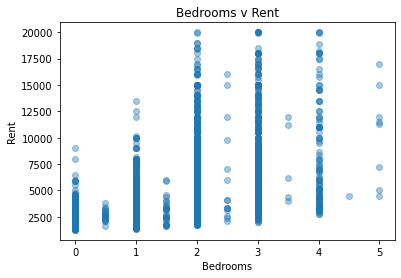

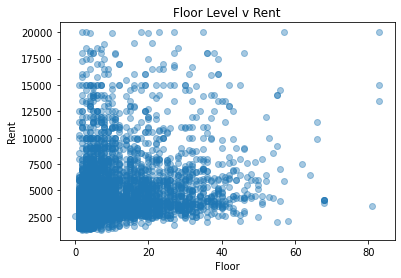

In [45]:
# Some visualizations to get an idea of correlation between the most releveant items in the datafram

plt.scatter(streetEasy[['size_sqft']], streetEasy[['rent']], alpha=0.4)
plt.title('Sqft v Rent')
plt.xlabel('Sqft')
plt.ylabel('Rent')
plt.show()
plt.clf()

plt.scatter(streetEasy[['min_to_subway']], streetEasy[['rent']], alpha=0.4)
plt.title('Subway Travel Time v Rent')
plt.xlabel('Time from Subway')
plt.ylabel('Rent')
plt.show()
plt.clf()

plt.scatter(streetEasy[['bedrooms']], streetEasy[['rent']], alpha=0.4)
plt.title('Bedrooms v Rent')
plt.xlabel('Bedrooms')
plt.ylabel('Rent')
plt.show()
plt.clf()

plt.scatter(streetEasy[['floor']], streetEasy[['rent']], alpha=0.4)
plt.title('Floor Level v Rent')
plt.xlabel('Floor')
plt.ylabel('Rent')
plt.show()